
# Autoregression

## Modelling Time Series

### Setup

* Imports and formatting dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.api import tsa
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
# Import the data
full_df = pd.read_csv("data/MonthlySales.csv")

# Here we have monthly sales data for a company.
# We will focus solely on the revenue and explore if we can model the company revenue using time series.
# Convert the revenue to be on a scale of millions for readability.
full_df["Revenue"] = full_df["Revenue"].apply(lambda x: x / 1e6)
# Select a subsection
df = full_df.loc[:, ["Period", "Revenue"]]
# Drop any NaN values
df.dropna(inplace=True)

# Convert the data to have datetime index with frequency of month start
df = df.set_index("Period")
df.index = pd.to_datetime(df.index, format="%d.%m.%Y")
df.index.freq = "MS"

In [3]:
df

,Revenue
Period,
2015-01-01,16.010072
2015-02-01,15.807587
2015-03-01,22.047146
2015-04-01,18.814583
2015-05-01,14.021480
...,...
2019-12-01,58.756474
2020-01-01,56.288301
2020-02-01,40.225243


# Forecasting Time Series

"Prediction is very difficult, especially
if it's about the future."
- Niels Bohr, Nobel laureate in Physics

**Time series analysis** is a broad area with many applications. **Forecasting** is an important and potentially very powerful application for which we will explore some key methodology. 

As our intuition tells us, **the further into the future we would like to forecast, the more uncertainty propagates**.

When we conduct forecasting, we may wish to only predict one time point ahead in the future. That is, what will the weather be like today, given the past. However, when you wish to predict further ahead, you may conduct 'out-of-sample forecasting'. This is where in order to predict further into the future, we have to use predicted values as our input. As each of our predictions has some error associated with it, when we use these to make new predictions, this error propagates. Along with random unexpected events, this makes forecasting difficult. 

There are many other applications of time series analysis, with another key example being anomaly detection. This is where models of 'normal' activity are determined so that unexpected behaviour can be flagged up. This can be used for detecting stolen credit cards based on transactional data and strange spending activity, for example. 

# Aims of this session

 - Understand the concept of stationarity and why it is important.
 - Explore the autoregressive model.
 - Extend to the ARMA model, a go-to tool in time series modelling.
 - Implement a time series model to generate a forecast.

As a possible extension we can also consider the seasonal ARIMA model. This is a simple extension of the ARMA process which will allow us to handle seasonality and stationarity in one go. 

## Getting a stationary time series


### What is stationarity?

**Recall:** An important feature of time series data is that it is **ordered chronologically**. 

- In previous models we have studied, the data has contained independent observations and therefore the order did not matter. Stationarity is an important property of time series data that removes this time dependence. 

- So for a stationary time series, the **mean and variance are independent of time**. 

### What is stationarity?

An important feature of time series data is that it is **ordered chronologically**. In previous models we have studied, the data has contained independent observations and therefore the order did not matter. The results would be the same even if you randomly “reshuffled” the data.

Stationarity is an important property of time series data that allows us to “reshuffle” it. Simply, a stationary time series has properties that do not depend on time. In particular, the **mean and variance are independent of time**. 

Therefore stationary time series have constant mean and variance and **doesn't have an obvious trend or seasonality,** as these affect the value of the time series at different times.  

This is a key concept in time series analysis and many models assume stationary data. Therefore we must be sure to check for it and handle non-stationarity as our models may be incorrectly fit otherwise. 

### How can we check for stationarity?

1) Investigate **by eye**. Look for a time series with roughly constant mean and variance.

2) Explore the **summary statistics**. You can inspect the mean and variance over sections of your data and compare.

3) Conduct **statistical tests** for stationarity, such as the Augmented Dickey Fuller test. This is a class of 'unit root' test, which determines how strongly a time series is defined by a trend.


### How can we make our data stationary?

**Recall:** Often we want our time series model to decompose as:

Observations = seasonal component + trend component + residuals,

where the residuals are stationary noise. 

- So we want to **remove the "non-stationary" components**. There are many methods for this, the most common being **differencing**. 

### How can we check for stationarity?

1) Typically we can investigate this **by eye**. We are looking for a time series that is flat (it doesn't need to be zero!), without any clear trend and no periodic fluctionations (i.e. no seasonality). We are also looking for a roughly constant variance over time. 

2) You can also investigate the **summary statistics**. A quick way to get an indication of if your data is stationary is to split it into partitions and compare the mean and variance of each group. You can then explore the differences simply by inspection, or if you know the distribution of your data you can use simple tests to check for statistically significant differences in the mean or variance. The easiest case for this is if your data is normally distributed.

3) There are **statistical tests** for stationarity. The **Augmented Dickey-Fuller test** is a type of statistical test called a unit root test, which determine how strongly a time series is defined by a trend. So we can use this to test if our data is stationary or not. This method is robust and quick to perform, so whilst examination by eye is typically sufficient, this is a very useful approach. In more detail:
 - The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the statistical method for testing the stationarity of a time series. Unit root is a characteristic of a time series that makes it non-stationary.
 - The null hypothesis is that there is a unit root to the model. If not rejected, the series is taken to be non-stationary.
 - The ADF test expands the Dickey-Fuller test equation to include high order regressive processes in the model.



### How can we make our data stationary?

**Recall:** Often we want our time series model to decompose as:

Observations = seasonal component + trend component + residuals,

where the residuals are stationary noise. So the general idea is to remove the "non-stationary" components. There are many methods for this, the most common being **differencing** which we will come to later. As we have seen, this is where we consider the change between points rather than the raw values. We can difference as many times as is necessary to make our data stationary.  

Other methods include considering rolling averages or if the data contains a trend, you can fit a linear regression (for example) to the data, and use the residuals as your stationary data. This is another way of removing long term trend.

# Key terms 

Some key terms you may encounter are:

- Stationary Process: A process that generates a stationary series.
- Stationary Model: A model that describes a stationary series.
- Trend Stationarity: A time series that does not exhibit a trend.
- Seasonal Stationarity: A time series that does not exhibit seasonality.

Extra discussion on this: How to Check if Time Series Data is Stationary with Python:
https://machinelearningmastery.com/time-series-data-stationary-python/

## Which of these are stationary?

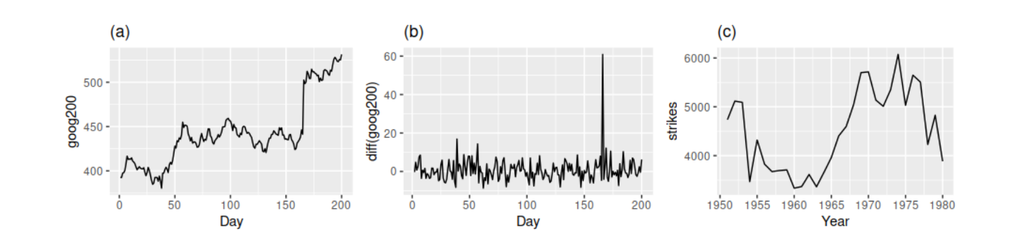

(a) Google stock price for 200 consecutive days

(b) Daily change in the Google stock price for 200 consecutive days

(c) Annual number of strikes in the US;

Source: https://otexts.com/fpp2/stationarity.html

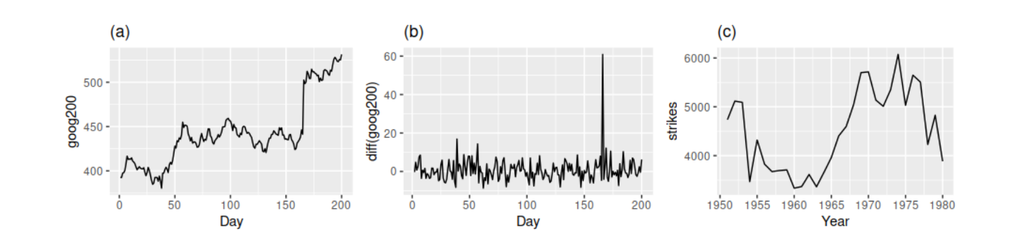

(a) **Not stationary:** Change in trend, stock price increases with time.

(b) **This is stationary:** Roughly constant mean and constant variance. There is no predictable trend or seasonality. 

(c) **Not stationary:** Varying levels, the mean changes considerably depending on which window of time is considered.

## Company Revenue Data

Here we will explore if we can model the company revenue using time series. Before fitting a time series model, we will look at **decomposing the series** and **considering stationarity**. 

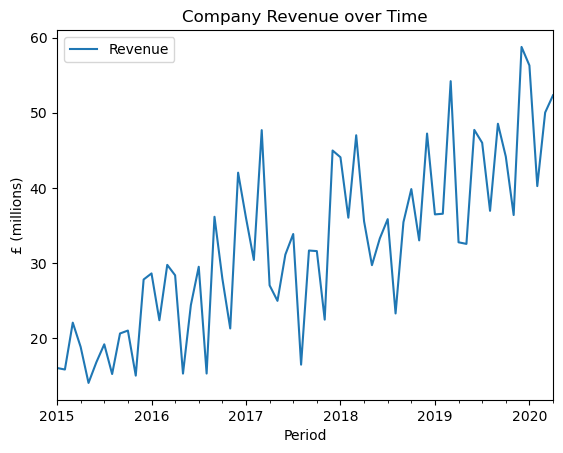

In [4]:
# We can plot the data to see what it looks like
# Note we have imported and formatted the data at the start
ax = df.plot()
ax.set_ylabel("£ (millions)")
ax.set_title("Company Revenue over Time")
plt.show()

### Decomposition

We can decompose the original time series into **constituent parts**. 

Typically we assume an additive model such that the overall data is made up of the **sum of a trend component, a seasonality component, and residuals**, which are the remaining values. 

It is important to consider the scale of each component when producing such decompositions to see the relative effect.

The method to compute the composite parts usually works by considering a moving average related to the length of the seasonality component.

In [5]:
# Explore the seasonality components
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df)

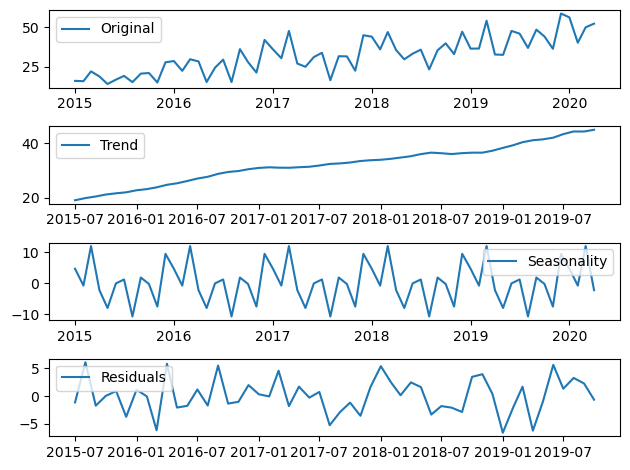

In [6]:
# Define the trend, seasonal and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the results
plt.subplot(411)
plt.plot(df, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()

Trend:
A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear! 

Seasonal:
Seasonality refers to when a time series is affected by seasonal factors, such as time of the year or the day of the week. It will be of a fixed frequency.

Side point:
Note that cyclic behaviour happens when apparent 'periodicity' occurs but the rises and falls are not of a fixed frequency. These might be due to economic conditions for example.

For our data we can see that the trend is a key factor. We se that the seasonal component varies from -10 to 10 with an annual dips over summer and spikes over the winter period. Finaly the residuals are mostly quite small, however there is variability in our data which is not captured by the trend and seasonality alone.

You can read about the specifics of how this decomposition works [here](https://otexts.com/fpp2/classical-decomposition.html). Typically, this works by considering a moving average related to the length of the seasonality component. The trend is removed and the seasonal component is obtained by averaging the detrended values for each season. The remainder component is then found by subtracting the estimated seasonal and trend components.

### Stationarity

We can also consider our original data series and ask if it looks stationary? That is, is there a constant mean and constant variance or can we see obvious trends or seasonality?

Text(0.5, 1.0, 'Does this look stationary ?')

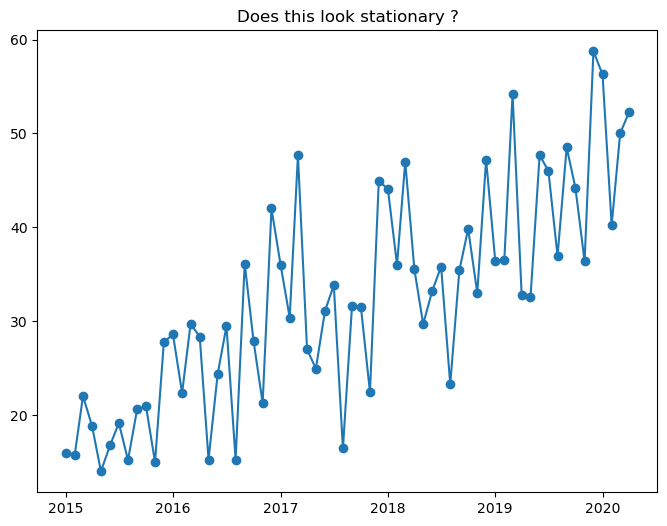

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(df, "-o")
plt.title("Does this look stationary ?")

### Differencing

Differencing is when we consider the difference between each point and the previous value. So we have the **change in values** rather than the raw value. We can define it as:

$$
{\rm{diff}}(X) = X[t] - X[t-1],
$$

so that 

$$
{\rm{diff}}(X)[1] = X[1] - X[0],\\
{\rm{diff}}(X)[2] = X[2] - X[1],\\
\vdots
$$

We can apply differencing as many times as we like by differencing the differenced time series. This is done in Python simply by using `X.diff(n)`, where `n` is how many times you'd like to difference series `X`. 

In [8]:
# As df[-1] does not exist, the first value (df[0]-df[-1]) is NaN
# Therefore we use dropna to remove the NaN introduced
df_diff = df.diff(1).dropna()

### Differencing

Using differencing, we can make our data stationary. That is, by considering the change in values rather than the raw vaules we can **transform our data** and often remove time dependent features. 

Text(0.5, 1.0, 'Does this look stationary ?')

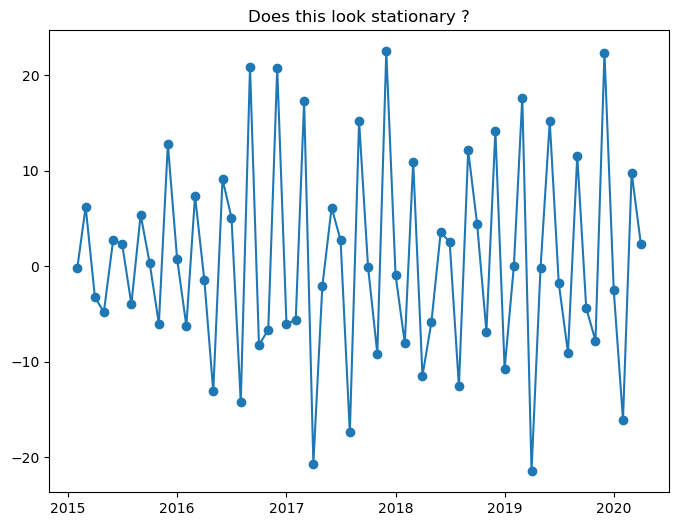

In [9]:
df_diff = df.diff(1).dropna()
plt.figure(figsize=(8, 6))
plt.plot(df_diff, "-o")
plt.title("Does this look stationary ?")

By eye, this now looks stationary after differencing once. Now we have confirmed that is it stationary we can name the result `time_series` and move onto the modelling of our time series.

In [10]:
time_series = df_diff
time_series.head()

,Revenue
Period,
2015-02-01,-0.202485
2015-03-01,6.239559
2015-04-01,-3.232563
2015-05-01,-4.793104
2015-06-01,2.762449


## Autoregressive model

### The intuition

- Autoregressive (AR) models assume that **past values are key to predicting the future**.
- By considering a given number of previous timepoints, we can use **regression** to predict the next value.
- For example, sales of a product over the last 7 days can inform me about the sales tomorrow.

### The maths

In an autoregressive model, values are modelled as a **linear combination of the $p$ past values.** An autoregressive model of order $p$, usually indicated as $AR(p)$, can be written as:

$$
y_{t} = c + (\phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p}) + e_{t},
$$

where

* `c` is the mean of the time-series
* `e_t` is the noise

### Selecting the best choice of $p$

It is important to select a choice of $p$ such that we are not overfitting or overcomplicating our model, whilst also ensuring we capture the key internal behaviour of the time series. 

To do this we use a function called `ar_select_order` which finds the optimal lags according to some criteria, known as the 'information criterion'.

In [11]:
from statsmodels.tsa.ar_model import ar_select_order

mod = ar_select_order(time_series, maxlag=6, ic="aic")
optlag = max(mod.ar_lags)
print("Optimal p =", optlag)

Optimal p = 5


The `ar_select_order` function assigns a score, given by the information criterion, to the fitted model up to a maximum lag given by `max_lag`.  There are several possible criterions to use with the most common being the 'AIC'.

The Akaike Information Criterion (AIC) is a metric which allows us to assess and compare model performance. It encourages a "good fit" while penalising having too many parameters (complex model). Specifically:
  * The AIC is lower if a model is more accurate or has less parameters. Therefore we can use the AIC as a comparative tool to tell us which model is better in terms of accuracy and simplicity. 
  * In the case of the AR model, setting $p$ too high will likely result in overfitting.
  
Therefore the the `ar_select_order` function provides us with the optimal model for our data, such that it minimises the AIC. 

We use the optimal lag identified in our AR model.

### Having a look at the AR model

Let's see if the AR($p$) does a good job compared to the original time series. 

Note that here we are using the full dataset rather than considering a train/test split to clearly illustrate the model and show how it performs on predicting the orignial data.

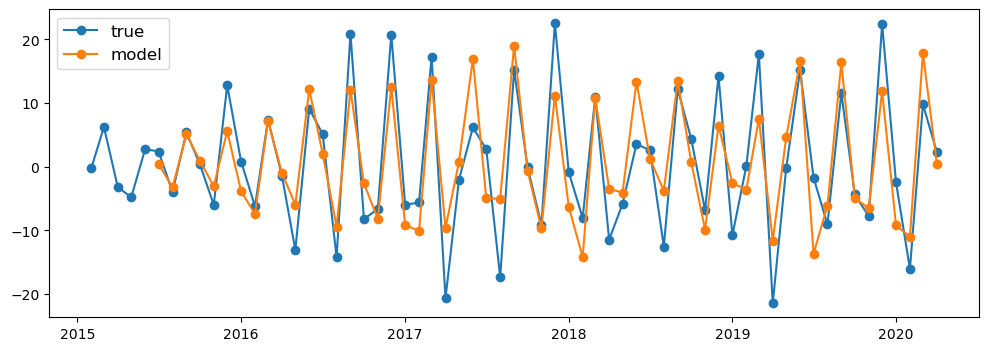

In [12]:
ar = tsa.AutoReg(time_series, lags=optlag)
ar_result = ar.fit()
prediction = ar_result.predict(start=optlag)

plt.figure(figsize=(12, 4))
plt.plot(time_series, "-o", label="true")
plt.plot(prediction, "-o", label="model")
plt.legend(fontsize=12)

Once we have identified the best choice of $p$ for our data, we can see how it performs on predicting the original data. That is, how accurately does the model describe our time series. Note that we have used the same time series for both training and prediction. This would not be done in practice, as will be showing in the Time Series Testing module, however it provides us with a clear way to illustrate the fit of our model to the original data. 

Here we can see that visually there is a strong relationship between our original data and the model. However, if we want to quantify the error we can consider the size of the residuals.

As with linear regression, we may want to look at the "size" of the residuals. For example you could display the Mean Absolute Error (MAE) using `mean_absolute_error` and feeding the original time series from `optlag` onwards and compare it with the prediction.

In [13]:
print("MAE = {0:.3f}".format(mean_absolute_error(time_series[optlag:], prediction)))

MAE = 4.891


## ARMA model

An AR model models each value in a time series using a linear relationship of the previous values. The mismatch $e_t$ is assumed to be "noise".

However there could still be information in the series of $e_t$! How about we **add the past errors as additional features?**

A common extension to the AR model is to consider the past errors as additional features, as well as the past values. That is, can the effect random shocks in the past inform us about random events in the future?

## Moving Average (MA) models

In MA($q$) models we apply a similar idea to AR($p$) models, however this time we conceptually have a **linear regression of the noise terms $e_t$**. That is, we want to see the **effect of past random shocks** on our time series.

We have:

$$
y_t = c + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \ldots + \theta_q e_{t-q}. 
$$

MA($q$) models are more difficult to fit because the noise terms are not observed.

This leads us onto moving average models. These allow us to model the noise terms $e_t$. In the equation given we have a constant term $c$, and then coefficients (being the $\theta_i$s) relating to the effect of previous error terms (denoted with $e_{t-i}$).

## ARMA Models

This leads to the **ARMA** model with an autoregressive part and a moving average part:

$$
y_{t} = c + \underbrace{ \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} }_{AR(p)} + \underbrace{ \theta_{1}e_{t-1} + \theta_{2}e_{t-2} + \dots + \theta_{q}e_{t-q} }_{MA(q)} +e_{t},
$$

The ARMA($p$,$q$) model combines the AR($p$) and MA($q$) models together.

**Example:** assume we have an AR(p) model that does a reasonable job, but always
over-predicts according to the latest error. We can use an MA model to account for this!

ARMA models are a go-to tool for time series modelling. By combining the power of the AR and MA models we can cover a broader range of process and account for different kinds of behaviour and effects. 

### Choosing Parameters

As with the AR process, we can use Python functions to select optimal parameters according to the AIC

In [14]:
param_choice = tsa.arma_order_select_ic(
    time_series, max_ar=2, max_ma=2, ic="aic", trend="c"
)
print("ARMA(p,q) =", param_choice["aic_min_order"], "is the best.")

ARMA(p,q) = (2, 2) is the best.


MAE = 4.863


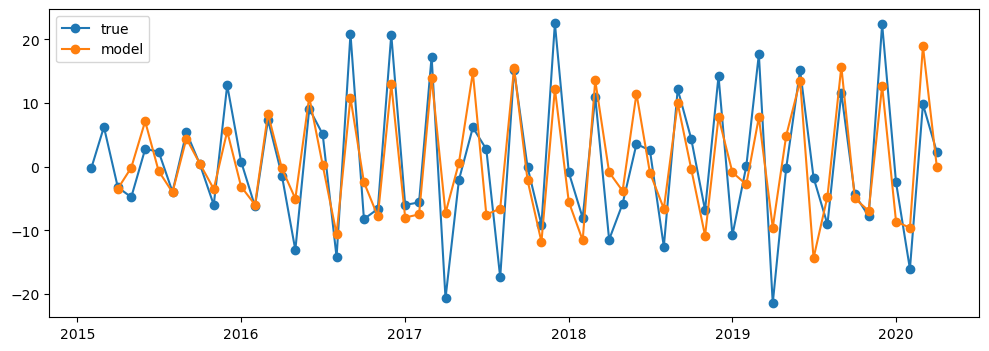

In [15]:
arma = tsa.ARIMA(
    time_series,
    order=(param_choice["aic_min_order"][0], 0, param_choice["aic_min_order"][1]),
)
arma_result = arma.fit()
prediction = arma_result.predict(start=2)

plt.figure(figsize=(12, 4))
plt.plot(time_series, "-o", label="true")
plt.plot(prediction, "-o", label="model")
plt.legend()

print("MAE = {0:.3f}".format(mean_absolute_error(time_series[2:], prediction)))

## Extending this setup: ARIMA, SARIMIA, ARIMAX and SARIMAX

 - **I** refers to 'integrated' and is parameterised by $d$ - the amount of time the model can be differenced to try and make it statiuonary, ie; _how many differences are required to make the data stationary?_.
 - **S** stands for seasonal, so we can also account for seasonality, by adding additional lagged moving averages, such as monthly.
 - **X** refers to exogenous, meaning these models can additionally take account of exogenous.

SARIMAX offers huge flexiblity to your time series model. Not only can we pass in parameters relating to the AR and MA components, being the $p$ and $q$ we've encountered, but we can handover the differencing and seasonality modelling to this function.

As before, we will need to explore which parameters are most appropriate, that is $d$ for the number of times to difference until stationary, and a $p$, $d$, and $q$ relating to the stationarity component. We can also pass in a periodicity that the algorithm should use, indicating if your data has annual behaviour for example.  

In [16]:
# The final value in the seasonal order influences the p, d, and q parameters.
# For example, a value of 12 for monthly data suggests a yearly seasonal cycle.
# Likewise a value of 52 for weekly data suggests a yearly seasonal cycle
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = SARIMAX(
    time_series,
    trend="c",
    order=(2, 0, 2),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
)

# trend parameter='c': we have a constant trend
# order=(1,0,2): Our AR parameter is 1, our MA parameter is 2, and as our data is stationary, we difference 0 times
# seasonal_order=(1,0,1,12): Our data is annually seasonal and it's recorded monthly, so 12 gives the frequency
# The code for this is given at the end of this notebook
# enforce_stationarity and enforce_stationarity are False. These are mathematical properties that typically hold, but
# setting them to false allows us to explore all parameter sets.

In [17]:
# Fit the model
sarima_result = mod.fit()

In [18]:
# Form a prediction, starting at the maximum value of the p, q parameters
prediction = sarima_result.predict(start=3)

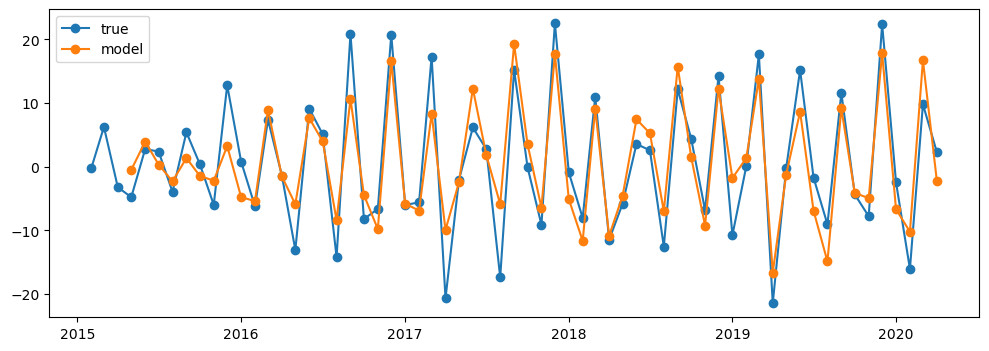

MAE = 3.873


In [19]:
plt.figure(figsize=(12, 4))
plt.plot(time_series, "-o", label="true")
plt.plot(prediction, "-o", label="model")
plt.legend()
plt.show()

# add your code here to show the MAE
print("MAE = {0:.3f}".format(mean_absolute_error(time_series[3:], prediction)))

By considering seasonality we have further lowered our MAE.

An excellent resource is the book:

Forecasting: Principles and Practice
by Rob J Hyndman and George Athanasopoulos.

The online book is available here:
https://otexts.com/fpp2/

## Extra

### Selecting parameters for the seasonal order

In order to choose the best possible parameters for our seasonal order in the SARIMAX model, we can use the below code to effectively grid search over a range of parameters and identify the best one in terms of MAE.

In [20]:
# Note that this code takes a while to run due to searching over a large parameter space.

import warnings
import itertools

warnings.filterwarnings("ignore")  # specify to ignore warning messages

# Set p, and q to take values from 0 to 3.
p = q = range(0, 4)
# Set d to take values from 0 to 1.
d = range(0, 1)

In [21]:
# Initialise a list to store the mean absolute errors for each parameter set
mae_values = []

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Show what pdq is; we see that its a list of all possible combinations of p, d and q
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [22]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# We can see we've appended 12 onto each triple so that it's in the format SARIMAX expects
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12)]

In [23]:
# Iterate over each option in seasonal_pqd
for param_seasonal in seasonal_pdq:
    # Generate a SARIMA model with the selected parameters for the seasonal order
    mod = tsa.statespace.SARIMAX(
        time_series,
        trend="c",
        order=(2, 0, 3),
        seasonal_order=param_seasonal,
        enforce_stationarity=False,
        enforce_invertibility=False,
    )

    # Fit and predict the model
    results = mod.fit()
    prediction = results.predict(start=3)
    # If the prediction has resulted in any NaNs we want to ignore this parameter set so set the mae very high
    if np.isnan(prediction).any():
        mae = 1e100
    else:
        # Otherwise we can store the mae
        mae = mean_absolute_error(time_series[3:], prediction)
    # Append the mae to our list
    mae_values.append(mae)

In [24]:
# Now we can find the minimum value in our list of errors and get the corresponding seasonal parameters
min_index = mae_values.index(min(mae_values))
best_seasonal_params = seasonal_pdq[min_index]
print(best_seasonal_params)

(3, 0, 2, 12)
